## Method 1: Natural Language Processing
To uncover how films use emotions and analyze their evolution and impact, we detect emotions from movie plot summaries sourced from Wikipedia. The movie metadata is merged with character metadata and plot summaries to create a unified dataset. Emotions are then extracted using various pre-trained models. <br>

This has already been done above.
This dataset has been expanded to include a probability score for each of eight distinct emotions associated with every movie plot.

## Method 2: Aggregation and Comparison
To explore the connections between genres and emotions, the extracted emotional data is aggregated at the genre level. The resulting emotional profiles are then compared across genres to identify differences and patterns.

We calculate statistics (mean, median, variance) for each emotion category within a genre. These statistics form an "emotional profile" for each genre.


### Mathematical notation calculating the emotion means across the genres:
\begin{equation*}
	\begin{aligned}
		{E}_{jk} = \frac{1}{N_k} \sum_{i=1}^n (E_{ij} \cdot G_{ik})
	\end{aligned}
\end{equation*}

Where:<br>
$\ E_{ij}$ is the emotion score for emotion j in movie i  
$\ G_{ik} $ is the binary value for genre k being assigned to movie i
<br>$\ N_{k} $ is the number of movies that belong to genre k, given by $\ N_{k} = \sum_i G_{ik}$
<br>$n$ is the total number of movies

Normalization: To make the emotional profiles comparable we normalize the values within each emotion:


We can use numpy to easily work with tensors and make us of efficient broadcasting to perform mathematical operation on slices of the data

### Implementation in Numpy for calculating the emotion means across the genres
We can use numpy to easily work with tensors and make us of efficient broadcasting to perform mathematical operations on slices of the data. First create numpy arrays in a way that we can efficiently store the relationships of our data and keep the arrays dense to avoid unnecessary overhead in computation.

In [1]:
import numpy as np

n_movies = 42249
n_emotions = 8 
n_genres = 363

movie_emotions = np.zeros((n_movies, n_emotions))
movie_genres = np.zeros((n_movies, n_genres))
genre_emotion = np.zeros((n_genres, n_emotions))

# Create genre_emotion array
for genre_idx in range(movie_genres.shape[1]):
    genre_mask = movie_genres[:, genre_idx].reshape(-1, 1) 
    genre_idx_emotions = movie_emotions * genre_mask
    
    # Sum the emotions for this genre
    emotion_sums = np.sum(genre_idx_emotions, axis=0)
    
    # Count the number of movies in this genre
    genre_count = np.sum(genre_mask)
    
    if genre_count > 0:
        genre_emotion[genre_idx] = emotion_sums / genre_count

### Comparison between Genres

After aggregation, comparisons between genres can be done using visual methods like **box plots** to visually compare the emotional profiles of each genre. Because the emotion values were normalized it is possible to analyze how the different emotions differ from the mean within a genre of interest.


### Implementation of box plots with example values

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generating random emotional scores for the Action genre
emotion_happiness = np.random.rand(50) * 0.5 + 0.5  
emotion_sadness = np.random.rand(50) * 0.5  
emotion_excitement = np.random.rand(50) * 0.3 + 0.7  
emotion_fear = np.random.rand(50) * 0.4 + 0.2  

emotions = [emotion_happiness, emotion_sadness, emotion_excitement, emotion_fear]
emotion_labels = ["Happiness", "Sadness", "Excitement", "Fear"]


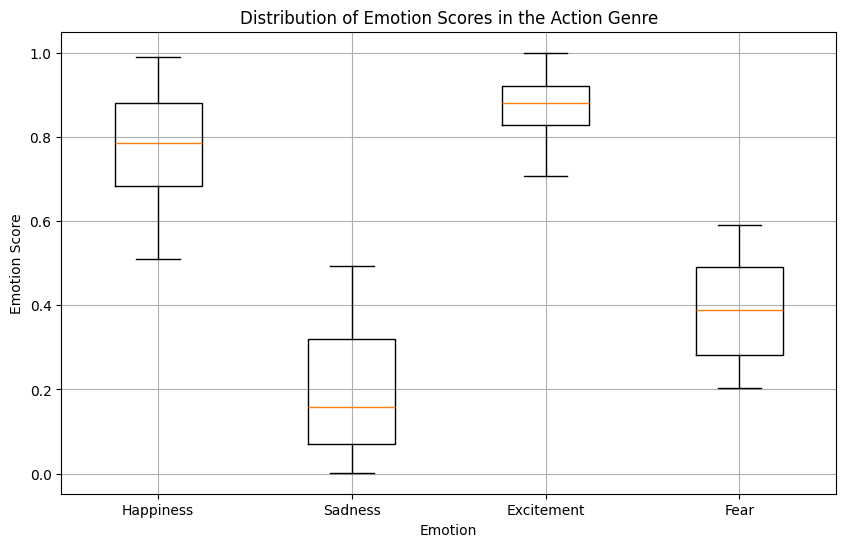

In [3]:
plt.figure(figsize=(10, 6))
plt.boxplot(emotions, labels=emotion_labels)
plt.title('Distribution of Emotion Scores in the Action Genre')
plt.ylabel('Emotion Score')
plt.xlabel('Emotion')
plt.grid(True)
plt.show()


## Method 3: Time Series Analysis

Time series analysis involves the study of data points collected or recorded at specific time intervals. The goal is to identify meaningful statistics and characteristics of the data. Time series data can be decomposed into several components, typically including trend, seasonality, and noise.

### Components of Time Series

1. *Trend (T_t)*: The long-term progression of the series. It represents the general direction in which the data is moving over a long period.
2. *Seasonality (S_t)*: The repeating short-term cycle in the series. It captures the periodic fluctuations.
3. *Noise (N_t)*: The random variation in the series. It represents the irregular fluctuations that do not follow a pattern.

Mathematically, a time series can be represented as:

$$Y_t = T_t + S_t + N_t$$

or in a multiplicative form:

$$Y_t = T_t \times S_t \times N_t$$

### Mathematical Notation and How We Use It

We are going to perform time series analysis on emotion classification results from movie plots.

After conducting an emotion classification task on 40,000 movie plots, resulting in 8 different emotion classes, each with a respective probability for each plot. The goal is to analyze how these emotions have changed over the years.

The steps involved are:
1. Calculate the average probability of each emotion for each year.
2. Perform time series analysis on each emotion to observe trends and changes over time.
3. Model these time series using statistical methods.

Possible statistical models for time series analysis include:
- *ARIMA (AutoRegressive Integrated Moving Average)*
    Trying to model the next value in the series as a linear combination of the previous values and the previous errors.
    - Formula: ARIMA(p, d, q)
    - General form: $$\Delta^d Y_t = \phi_1 \Delta^d Y_{t-1} + \cdots + \phi_p \Delta^d Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}$$

- *SARIMA (Seasonal AutoRegressive Integrated Moving Average)*
    Extends ARIMA to include seasonality.
    - Formula: SARIMA(p, d, q)(P, D, Q, s)
    - General form: $$\Delta^d Y_t = \phi_1 \Delta^d Y_{t-1} + \cdots + \phi_p \Delta^d Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q} + \text{seasonal terms}$$

- *Exponential Smoothing State Space Model (ETS)*
    A flexible model that can capture different types of trends and seasonaliy.
    - Formula: ETS(A, Ad, N)
    - General form: $$Y_t = (\text{level} + \text{trend} + \text{seasonality}) \times \text{error}$$

- *GARCH (Generalized Autoregressive Conditional Heteroskedasticity)*
    A model for analyzing and forecasting time series data that includes autoregressive and moving average terms for the variance.
    - Formula: GARCH(p, q)
    - General form: $$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \cdots + \alpha_p \epsilon_{t-p}^2 + \beta_1 \sigma_{t-1}^2 + \cdots + \beta_q \sigma_{t-q}^2$$

These models will help us understand the temporal dynamics of emotions in movie plots and potentially forecast future trends. 

Just to give an example here is a setup where we generated a random series from an ARIMA(1,1,1) model.

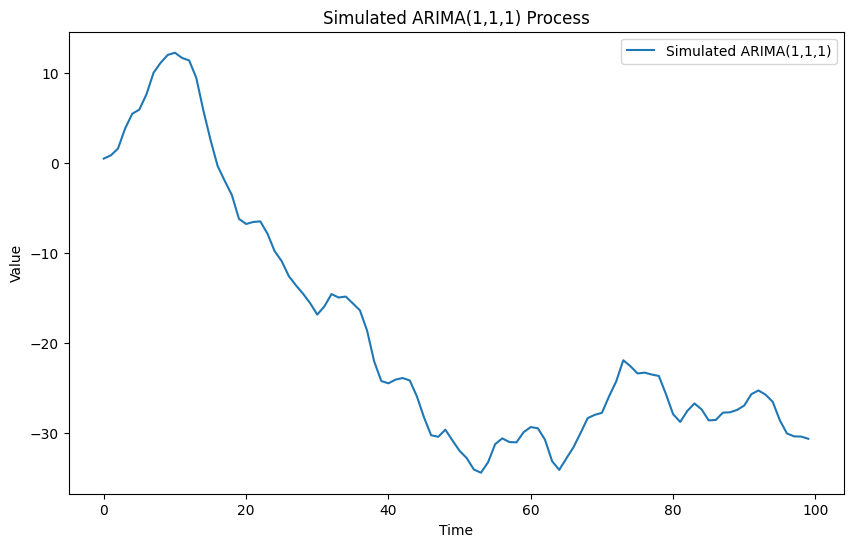

In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

import matplotlib.pyplot as plt

# Define the autoregressive and moving average coefficients
ar = np.array([1, -0.5])
ma = np.array([1, 0.5])
arma_process = ArmaProcess(ar, ma)

# Simulate an ARMA(1,1) prcess
np.random.seed(42)
simulated_data = arma_process.generate_sample(nsample=100)

# Integrate the data to get the ARIMA(1,1,1)
integrated_data = np.cumsum(simulated_data)

# Plot the integrated data to get the ARIMA(1,1,1)
plt.figure(figsize=(10, 6))
plt.plot(integrated_data, label='Simulated ARIMA(1,1,1)')
plt.title('Simulated ARIMA(1,1,1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Method 4: Regression Analysis

The impact of emotions on the actor traits age and gender is analyzed using regression analysis. This method assesses relationships between the emotional tones of films and the age and gender of involved actors. Additionally, regression analysis may be used to explore connections between movie languages and emotional tones, complementing the chi-squared test described below.


### Mathematical notation
The regression model to analyze the impact of emotions on actor traits (age and gender) and movie language can be expressed as follows:

begin{equation*}
	\begin{aligned}
    Y = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + ... + \beta_n \times X_n  
    \end{aligned}
\end{equation*}

Where: <br>
$\ Y$ is the Dependent Variable <br>
$\ X_i$ are the independent variables (the emotion score of emotion $i$ )<br>
$\beta_i$ are the coefficients for emotion $i$ <br>
$n$ is the number of emotions

Assumptions: <br>
Linear relationship between the dependent variable and each of the independent variable <br>
Independence of Variables


By analyzing the coefficient see the influence of each variable X_i on the dependent variable Y. The sign of the coefficient tells us if the influence is positive or negative. 

This regression forumlation would show the different impact of age, gender and languages on the emotion score of a given emotion, when computing the regression on the whole dataset: <br>
begin{equation*}
	\begin{aligned}
    Y = \beta_0 + \beta_1 \times \text{Age} + \beta_2 \times \text{Gender} + \beta_3 \times \text{Spanish} + \beta_4 \times \text{French} 
\end{aligned}
\end{equation*}

When modelling age, gender and language as the dependend variable when need to take into account their variable type. While age is continuously and can be modelled with the expression obove, gender is a binary variable and language categorial. 

For the binary variable gender we use logistic regression:

begin{equation*}
	\begin{aligned}
        \log\left(\frac{P(Y = 1)}{P(Y = 0)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n
    \end{aligned}
\end{equation*}


Where $Y = 1$ indicates female, and $Y = 0$ indicates male. The probability that $Y$ is female is given by:

begin{equation*}
	\begin{aligned}
        P(Y = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}
    \end{aligned}
\end{equation*}

To obtain the coefficients that fit best to the date linear regression typically uses ordinary least squares. Logistic regression can be solved with Maximum Likelihood Estimation.

Logistic Regression:  The objective is to maximize the log-likelihood   $\max_{\beta} \ell(\beta))$

Linear Regression: The objective is to minimize the cost Function $J(\beta)$ based on Ordinary Least Square $J\min_{\beta} J(\beta)$

## Method 5: Clustering

To later explore the connection between emotional tones and user ratings, we first the cluster movies based on similarity of their emotional profiles. 
Patterns between clusters and user ratings are examined to determine how the different emotions influence user ratings and how the influence may vary across genres.

There are different clustering techniques to explore. Hierarchical methods enable the examination of similarity and dissimilarity across varying numbers of clusters. In contrast, non-hierarchical methods, such as k-means, focus on optimizing clustering for a predefined number of clusters.
### Mathematical Notation

Given a set of $ n $ objects $ X = \{x_1, x_2, \ldots, x_n\} $, cluster analysis aims to partition these objects into $ k $ clusters $ C = \{C_1, C_2, \ldots, C_k\} $ such that:

1. $ \bigcup_{i=1}^{k} C_i = X $ (each object belongs to exactly one cluster)
2. $ C_i \cap C_j = \emptyset$ for $ i \neq j $ (clusters are mutually exclusive)

The similarity or dissimilarity between objects is often measured using a distance metric $ d(x_i, x_j) $. Common distance metrics include:

- Euclidean distance: $ d(x_i, x_j) = \sqrt{\sum_{m=1}^{p} (x_{im} - x_{jm})^2} $
- Manhattan distance: $ d(x_i, x_j) = \sum_{m=1}^{p} |x_{im} - x_{jm}| $
- Cosine similarity: $ d(x_i, x_j) = 1 - \frac{\sum_{m=1}^{p} x_{im} x_{jm}}{\sqrt{\sum_{m=1}^{p} x_{im}^2} \sqrt{\sum_{m=1}^{p} x_{jm}^2}} $


### Clustering Algorithms to Explore

Several algorithms can be used for our cluster analysis, including:

1. *K-means clustering*: This algorithm partitions the data into $ k $ clusters by minimizing the within-cluster sum of squares (WCSS):
    $$
    \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
    $$
    where $ \mu_i $ is the centroid of cluster $ C_i $.

2. *Hierarchical clustering*: This algorithm builds a hierarchy of clusters either by agglomerative (bottom-up) or divisive (top-down) approaches. The result is often visualized using a dendrogram.

3. *DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*: This algorithm groups together points that are closely packed together, marking points that are in low-density regions as outliers.

4. *Gaussian Mixture Models (GMM)*: This algorithm assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. It uses the Expectation-Maximization (EM) algorithm to estimate the parameters.

### Example use for K-Means

We plan to cluster the movies based on its emotional profile. To create a similarity measure we take the L1 (L2 norm would square, which is not good with probabilities (values below 0)) of the 8 emotion score of each movie. We than calculate the distance between two movies based on one of the distance measure above. Different initializations help prevent bad results because of 

The movie clusters can further be analyzed on its relationship towards movie ratings. One idea would be to calculate the average rating of the movies within a cluster and analyze if there are notable differences.

### Evaluation Metrics

To evaluate the quality of clustering, several metrics can be used, including:

- *Silhouette score*: Measures how similar an object is to its own cluster compared to other clusters.
  $$
  s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $$
  where $ a(i) $ is the average distance between $ i $ and all other points in the same cluster, and $ b(i) $ is the minimum average distance between $ i $ and points in a different cluster.

- *Davies-Bouldin index*: Measures the average similarity ratio of each cluster with its most similar cluster.
  $$
  DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right)
  $$
  where $ \sigma_i$ is the average distance between each point in cluster $i$ and the centroid $\mu_i $, and $ d(\mu_i, \mu_j) $ is the distance between centroids $ \mu_i $ and $ \mu_j $.
